In [9]:
from torchvision.io import read_image
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_V2_Weights, fasterrcnn_resnet50_fpn_v2
from torchvision.transforms import ToPILImage
from torchvision.utils import draw_bounding_boxes
import cv2
to_img = ToPILImage()

image_path = "test-image4.jpg"

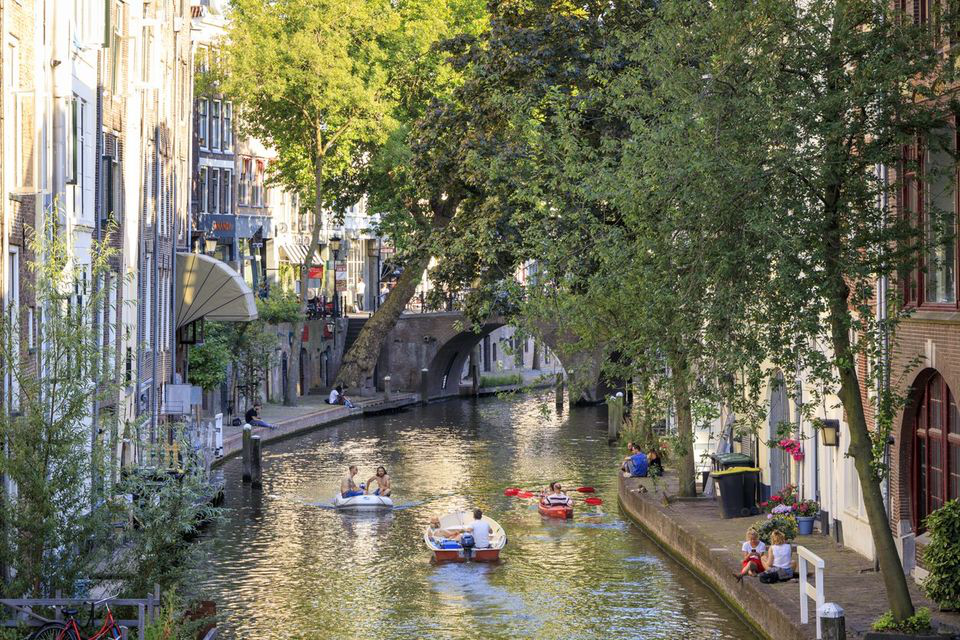

In [3]:
img = read_image(image_path)
to_img(img)

In [4]:
weights = FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1
model = fasterrcnn_resnet50_fpn_v2(weights=weights)
model.eval()
weights.meta["categories"]

['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'N/A',
 'book',
 'clock',
 'vase',
 'scissors',
 'ted

In [5]:
preprocess = weights.transforms()
img_transformed = preprocess(img).unsqueeze(0)

In [6]:
prediction = model(img_transformed).squeeze(0).softmax(0)

In [7]:
boxes = [[x[0].item(), x[1].item(), x[2].item(), x[3].item()] for x in prediction[0]["boxes"]]
categories = [weights.meta["categories"][x] for x in prediction[0]["labels"]]
scores = [x.item() for x in prediction[0]["scores"]]
boxes = list(zip(boxes, categories , scores))


[([364.7507019042969, 466.150146484375, 391.96826171875, 497.6209411621094],
  'person',
  0.9964776635169983),
 ([339.1510925292969, 464.7348327636719, 364.2172546386719, 497.421142578125],
  'person',
  0.995699405670166),
 ([757.504638671875, 528.61328125, 793.7435302734375, 583.7726440429688],
  'person',
  0.9925897121429443),
 ([25.791797637939453,
   601.0032348632812,
   136.89202880859375,
   639.7605590820312],
  'bicycle',
  0.9875653386116028),
 ([424.0761413574219, 513.1458129882812, 509.160400390625, 562.8727416992188],
  'boat',
  0.9865104556083679),
 ([460.2947692871094, 509.2350769042969, 491.778076171875, 549.5986328125],
  'person',
  0.9858107566833496),
 ([619.4413452148438, 441.843505859375, 647.9205322265625, 477.5177307128906],
  'person',
  0.9841320514678955),
 ([537.2554321289062, 493.4460144042969, 573.611083984375, 520.935546875],
  'boat',
  0.9818463921546936),
 ([543.55419921875, 482.4293518066406, 569.490234375, 506.3285827636719],
  'person',
  0.9707

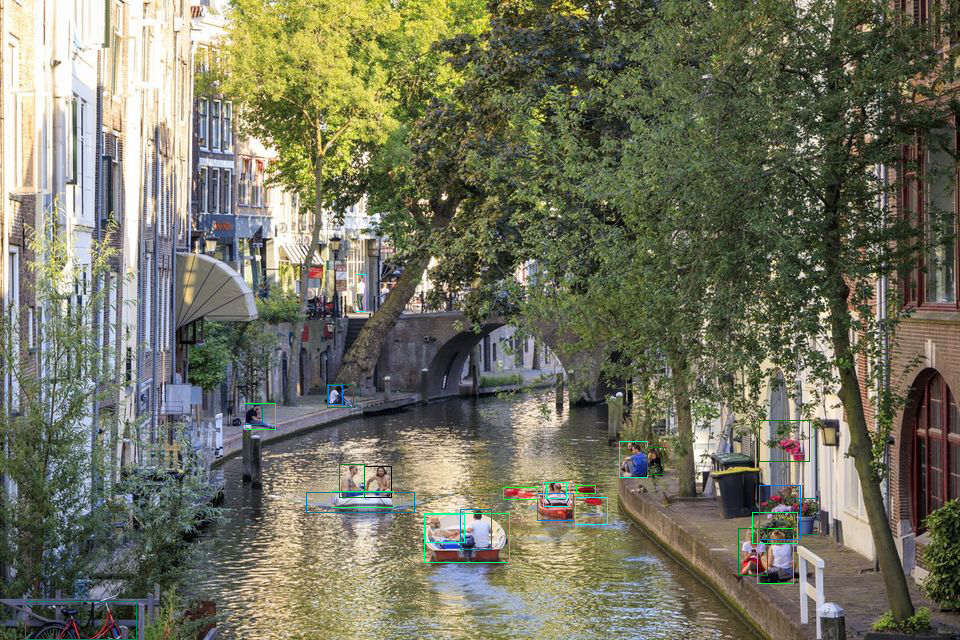

In [22]:
resulllll = draw_bounding_boxes(img, prediction[0]["boxes"][prediction[0]["scores"] > 0.5], width=1)
# show(resulllll)
# prediction[0]["boxes"]
to_img(resulllll)